In [102]:
import pandas as pd

In [103]:
region = "viet-bac"  # dong-bang

In [104]:
basePath = f"/home/phuonglh/code/s2s/bin/{region}/clusterC/"

In [105]:
path1 = f"{basePath}/1-0.tsv"
path2 = f"{basePath}/2-0.tsv"

In [106]:
df1 = pd.read_csv(path1, header=None, delimiter='\t')
df2 = pd.read_csv(path2, header=None, delimiter='\t')
df1.columns = ["estimate", "real"]
df2.columns = ["estimate", "real"]

In [107]:
df1

,estimate,real
0,0.670221,0.12500
1,0.668649,0.60000
2,0.496216,2.01250
3,0.351428,0.00000
4,0.307905,0.00000
...,...,...
1449,0.983689,0.86875
1450,0.556960,9.61250
1451,0.267672,11.28750
1452,0.249483,0.03750


In [108]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precipitation')

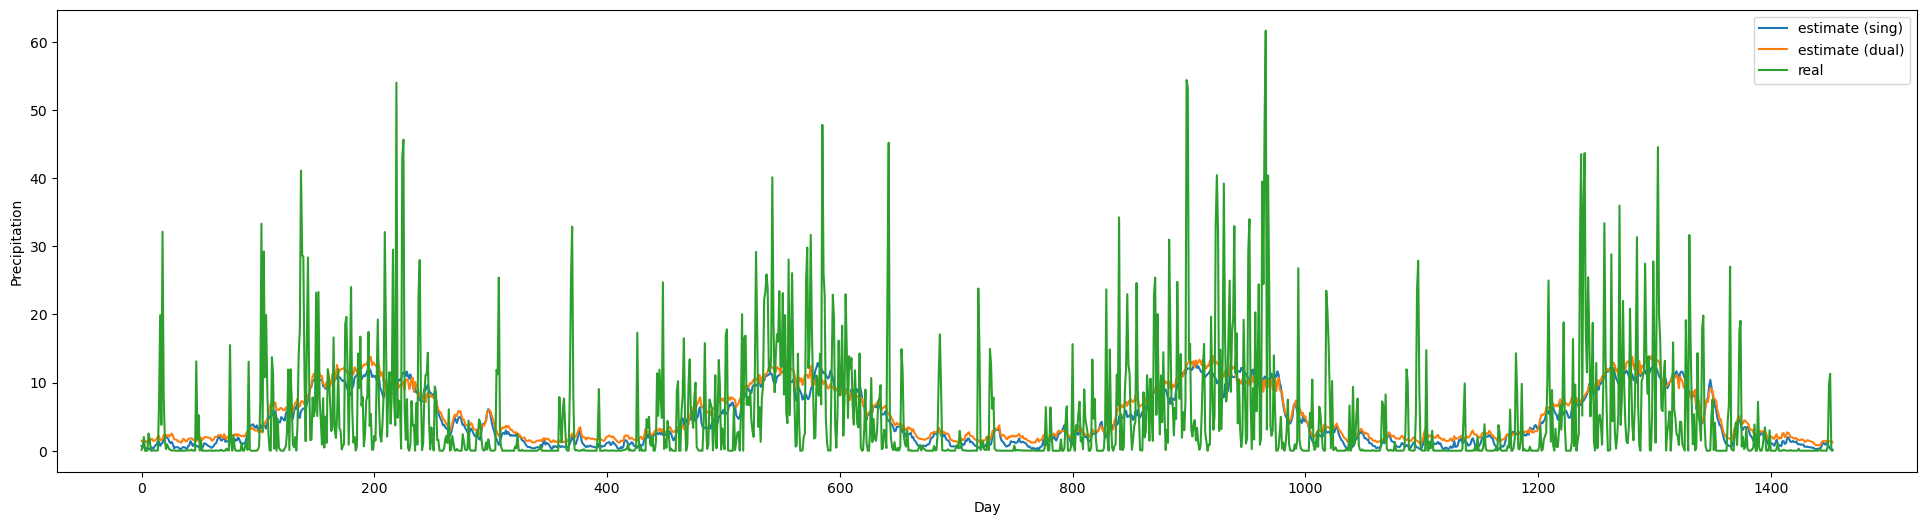

In [109]:
plt.figure(figsize=(24,6))
plt.plot(df1["estimate"])
plt.plot(df2["estimate"])
plt.plot(df1["real"])
plt.legend(["estimate (sing)", "estimate (dual)", "real"])
plt.xlabel('Day')
plt.ylabel('Precipitation')


In [110]:
def isExtreme(value):
    if value >= 0.9:
        return 1
    else:
        return 0

In [111]:
df1Rank = df1['real'].rank(pct=True)

In [112]:
df1Rank

0       0.398900
1       0.491747
2       0.592847
3       0.107634
4       0.107634
          ...   
1449    0.516850
1450    0.823590
1451    0.850069
1452    0.338377
1453    0.298831
Name: real, Length: 1454, dtype: float64

In [113]:
y = df1Rank.apply(lambda v: isExtreme(v))

In [114]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1449    0
1450    0
1451    0
1452    0
1453    0
Name: real, Length: 1454, dtype: int64

In [115]:
df1['label'] = y

In [116]:
sum(y)

146

In [117]:
r1 = df1['estimate'].rank(pct=True)
y1 = r1.apply(lambda v: isExtreme(v))

In [118]:
r2 = df2['estimate'].rank(pct=True)
y2 = r2.apply(lambda v: isExtreme(v))

In [119]:
import sklearn
import sklearn.metrics

In [120]:
print(sklearn.metrics.classification_report(y, y1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1308
           1       0.23      0.23      0.23       146

    accuracy                           0.85      1454
   macro avg       0.57      0.57      0.57      1454
weighted avg       0.85      0.85      0.85      1454



In [121]:
print(sklearn.metrics.classification_report(y, y2))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1308
           1       0.28      0.28      0.28       146

    accuracy                           0.86      1454
   macro avg       0.60      0.60      0.60      1454
weighted avg       0.86      0.86      0.86      1454

